In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_folder='/Users/adrianahernandezgonzalez/LabNotebook/vgic_mutants/kv21/dataDistances/'

# Load the CSV file into a DataFrame
#Vanilla
csv_file_vanilla = data_folder+'25-12-04_Kv2.1_wt_vanillaAF2_distances.csv'
df_vanilla = pd.read_csv(csv_file_vanilla)

#Masked
data_folderTest='/Users/adrianahernandezgonzalez/LabNotebook/25-12/vgic_mutants/'
csv_file_masked = data_folderTest+'25-12-17_Kv2.1_wt_maskedAF2test_distances.csv'
df_mask = pd.read_csv(csv_file_masked)

#EMS?

# Show the first few rows to confirm the data is loaded correctly
#print(df.head())

In [3]:
df_vanilla

,pdb_file,shortest_ARG291A-GLU178A,shortest_ARG291A-ASP223A,shortest_ARG291A-GLU231A,shortest_ARG291A-CYS234A,shortest_ARG291A-PHE238A,shortest_ARG291A-GLU241A,shortest_ARG291A-ASP264A,shortest_ARG291A-GLU279A,shortest_ARG292A-GLU178A,...,CA_CA_C_GLY377_CA-D_THR375_CA,CA_CA_C_GLY377_CA-D_VAL376_CA,CA_CA_C_GLY377_CA-D_GLY377_CA,CA_CA_C_GLY377_CA-D_TYR378_CA,CA_CA_C_GLY377_CA-D_GLY379_CA,CA_CA_C_TYR378_CA-D_THR375_CA,CA_CA_C_TYR378_CA-D_VAL376_CA,CA_CA_C_TYR378_CA-D_GLY377_CA,CA_CA_C_TYR378_CA-D_TYR378_CA,CA_CA_C_TYR378_CA-D_GLY379_CA
0,kv21_wt_unrelaxed_rank_001_alphafold2_multimer...,41.0,13.3,18.6,27.0,29.0,34.1,32.6,16.6,39.3,...,8.43,4.82,5.68,4.87,8.24,11.72,8.42,7.77,5.62,7.72
1,kv21_wt_unrelaxed_rank_001_alphafold2_multimer...,39.2,9.8,16.1,24.4,26.5,32.1,30.2,19.1,39.2,...,8.35,9.19,9.13,7.83,8.35,11.35,11.03,10.16,7.38,6.94
2,kv21_wt_unrelaxed_rank_001_alphafold2_multimer...,39.7,10.2,16.3,24.6,26.8,32.3,30.7,17.8,38.4,...,7.64,4.32,4.58,7.03,7.60,10.78,7.30,6.45,6.72,5.31
3,kv21_wt_unrelaxed_rank_001_alphafold2_multimer...,41.0,13.3,18.6,27.0,29.0,34.1,32.6,16.6,39.3,...,8.43,4.82,5.68,4.87,8.24,11.72,8.42,7.77,5.62,7.72
4,kv21_wt_unrelaxed_rank_001_alphafold2_multimer...,40.0,10.8,16.7,25.0,27.2,32.6,31.1,16.7,39.1,...,7.64,4.38,4.10,6.52,7.38,10.65,7.20,5.99,6.20,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,kv21_wt_unrelaxed_rank_500_alphafold2_multimer...,40.8,12.7,18.1,26.4,28.5,33.7,32.1,16.6,39.1,...,7.61,4.49,4.23,6.63,7.40,10.52,7.14,5.94,6.16,4.89
5996,kv21_wt_unrelaxed_rank_500_alphafold2_multimer...,40.9,12.5,17.9,26.3,28.4,33.6,32.1,16.6,39.4,...,7.62,4.46,4.19,6.61,7.38,10.54,7.13,5.91,6.14,4.84
5997,kv21_wt_unrelaxed_rank_500_alphafold2_multimer...,40.9,12.9,18.2,26.6,28.6,33.8,32.2,16.7,39.0,...,7.58,4.43,4.17,6.62,7.37,10.49,7.09,5.89,6.15,4.83
5998,kv21_wt_unrelaxed_rank_500_alphafold2_multimer...,41.3,13.1,18.3,26.8,28.8,33.9,32.4,16.9,39.3,...,7.61,4.46,4.16,6.59,7.36,10.52,7.12,5.87,6.10,4.80


In [4]:
for col in df_vanilla.columns:
    print(col)


pdb_file
shortest_ARG291A-GLU178A
shortest_ARG291A-ASP223A
shortest_ARG291A-GLU231A
shortest_ARG291A-CYS234A
shortest_ARG291A-PHE238A
shortest_ARG291A-GLU241A
shortest_ARG291A-ASP264A
shortest_ARG291A-GLU279A
shortest_ARG292A-GLU178A
shortest_ARG292A-ASP223A
shortest_ARG292A-GLU231A
shortest_ARG292A-CYS234A
shortest_ARG292A-PHE238A
shortest_ARG292A-GLU241A
shortest_ARG292A-ASP264A
shortest_ARG292A-GLU279A
shortest_ARG298A-GLU178A
shortest_ARG298A-ASP223A
shortest_ARG298A-GLU231A
shortest_ARG298A-CYS234A
shortest_ARG298A-PHE238A
shortest_ARG298A-GLU241A
shortest_ARG298A-ASP264A
shortest_ARG298A-GLU279A
shortest_ARG301A-GLU178A
shortest_ARG301A-ASP223A
shortest_ARG301A-GLU231A
shortest_ARG301A-CYS234A
shortest_ARG301A-PHE238A
shortest_ARG301A-GLU241A
shortest_ARG301A-ASP264A
shortest_ARG301A-GLU279A
shortest_ARG304A-GLU178A
shortest_ARG304A-ASP223A
shortest_ARG304A-GLU231A
shortest_ARG304A-CYS234A
shortest_ARG304A-PHE238A
shortest_ARG304A-GLU241A
shortest_ARG304A-ASP264A
shortest_ARG304A

In [5]:
def plot_distances_by_alias_violin(
    df,
    alias_dict,
    exp_distances_list=None,
    title_custom_add='',
    colors=None,
    fig_width=6,
    fig_height=6,
    dataset_labels=None,
    pdb_colors=None
):
    """
    Plots the distribution of distances by alias based on the specified columns.
    """

    aliases_in_order = list(alias_dict.keys())
    plot_records = []

    for alias in aliases_in_order:
        column_name = alias_dict[alias]
        if column_name not in df.columns:
            print(f"Warning: Column '{column_name}' not found in the DataFrame; alias '{alias}' will still appear empty.")
            plot_records.append({"Alias": alias, "Distance": None})
            continue

        distances = df[column_name].dropna()
        for d in distances.tolist():
            plot_records.append({"Alias": alias, "Distance": d})

        if len(distances) == 0:
            plot_records.append({"Alias": alias, "Distance": None})

    if not plot_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(plot_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    n_aliases = len(aliases_in_order)
    if colors is not None and len(colors) == n_aliases:
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", n_aliases)

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(
        x='Alias',
        y='Distance',
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        inner='box',
        cut=0,
        linewidth=0.8
    )

    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ['black'] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X','d','<','>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    plt.scatter(
                        [xpos], [exp_distance],
                        facecolors='white',
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=5,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')
    sns.despine()
    plt.tight_layout()

    handles, labels = plt.gca().get_legend_handles_labels()
    if any(lbl for lbl in labels):
        plt.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.0
        )

    plt.show()


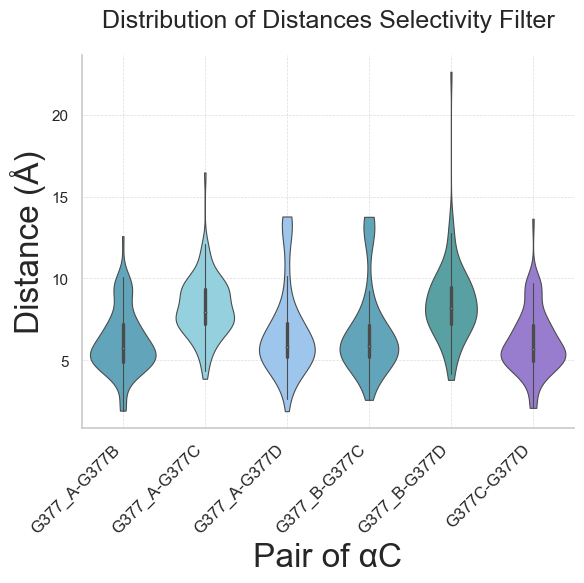

In [12]:
# Selectvity Filter Check
'''   TVGYG
    ("THR", 375,
    ("VAL", 376,
    ("GLY", 377,
    ("TYR", 378,
    GLY,379'''


alias_dict = {
    'G377_A-G377B': 'CA_CA_A_GLY377_CA-B_GLY377_CA',
    'G377_A-G377C': 'CA_CA_A_GLY377_CA-C_GLY377_CA',
    'G377_A-G377D': 'CA_CA_A_GLY377_CA-D_GLY377_CA',
    'G377_B-G377C': 'CA_CA_B_GLY377_CA-C_GLY377_CA',
    'G377_B-G377D': 'CA_CA_B_GLY377_CA-D_GLY377_CA',
    'G377C-G377D': 'CA_CA_C_GLY377_CA-D_GLY377_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#53acc9', '#89d7eb', '#91c7f9', '#53acc9', '#4dabae', '#9370DB']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #7fbs #D373,901,1421,1713
        'D373-E704': [5.804],
        'D373-K1103': [10.912],
        'D373-A1395': [8.988],
        'E704-E1135': [10.342],
        'E704-A1395': [12.075],
        'K1103-A1395': [6.84]
    },
    { #6uz3 #D373,E901,1421,1713
        'D373-E704': [5.332],
        'D373-K1103': [9.773],
        'D373-A1395': [8.78],
        'E704-E1135': [9.433],
        'E704-A1395': [11.71],
        'K1103-A1395': [6.371]
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 7fbs', 'PDB ID: 6uz23'] 
# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3']

# Assuming df is already loaded with your CSV file
#plot_distances_by_alias_violin(df, alias_dict, xp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter Subsampling 32-64', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)
plot_distances_by_alias_violin(df_mask, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)
    

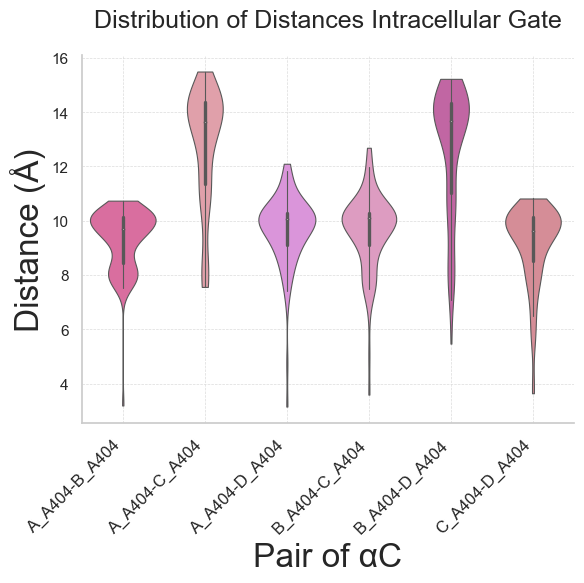

In [13]:

# Example usage
alias_dict = {
    'A_A404-B_A404':'CA_CA_A_ALA404_CA-B_ALA404_CA',
    'A_A404-C_A404':'CA_CA_A_ALA404_CA-C_ALA404_CA',
    'A_A404-D_A404':'CA_CA_A_ALA404_CA-D_ALA404_CA',
    'B_A404-C_A404':'CA_CA_B_ALA404_CA-C_ALA404_CA',
    'B_A404-D_A404':'CA_CA_B_ALA404_CA-D_ALA404_CA',
    'C_A404-D_A404':'CA_CA_C_ALA404_CA-D_ALA404_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#eb5c9e', '#ea96a3', '#e689e6', '#e891c3', '#d057a8', '#e1818f']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_list = [
    { #7FBS #M415,A939,I1472,I1773
    'M415-A742':[11.734],
    'M415-I1154':[],
    'M415-I1455':[],
    'A742-I1154':[],
    'A742-I1455':[],
    'I1154-I1455':[]
}, { #6UZ3
    'M415-A742':[10.933],
    'M415-I1154':[],
    'M415-I1455':[],
    'A742-I1154':[],
    'A742-I1455':[],
    'I1154-I1455':[]
}
]
# Labels for the datasets
dataset_labels = ['PDB ID: 7fbs', 'PDB ID: 6uz3']

# Custom colors for each PDB dataset
pdb_colors = ['#ff5733', '#33ff57', '#3375ff', '#ff33c4', '#ffd633', '#33fff5']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_mask, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Intracellular Gate', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


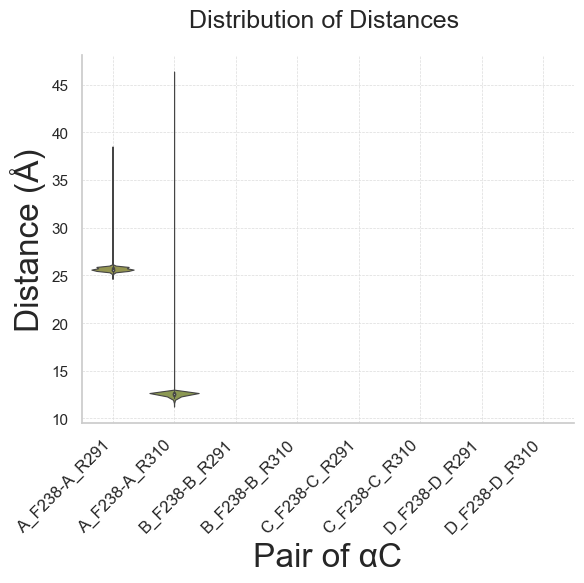

In [14]:
# Gating charges vs the aromatic middle in S2
alias_dict = {
    'A_F238-A_R291': 'CA_CA_A_ARG291_CA-A_PHE238_CA',
    'A_F238-A_R310': 'CA_CA_A_ARG310_CA-A_PHE238_CA',
    'B_F238-B_R291': 'CA_CA_B_ARG291_CA-B_PHE238_CA',
    'B_F238-B_R310': 'CA_CA_B_ARG310_CA-B_PHE238_CA',####
    'C_F238-C_R291': 'CA_CA_C_ARG291_CA-C_PHE238_CA',
    'C_F238-C_R310': 'CA_CA_C_ARG310_CA-C_PHE238_CA',
    'D_F238-D_R291': 'CA_CA_D_ARG291_CA-D_PHE238_CA',
    'D_F238-D_R310': 'CA_CA_D_ARG310_CA-D_PHE238_CA',
    #'F1278-R1390': 'CA_ARG1279_CA-PHE1167_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#9fa046','#92a348', '#7aaa48','#6aae52', '#4fb38c','#4aac99','#43b5b1','#3ebbbd']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #8hlp
    'F170-R237': [15.3],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.2],
    'F940-K1015': [20.3],
    'F940-K1031': [16.5],
    'F1278-R1377': [13.4],
    'F1278-K1386':[15.3],
    #'F1278-R1390': [20.2]
   },
    { #8hma
     'F170-R237': [15.2],
    'F170-R246': [11.0],
    'F567-R620': [15.4],
    'F567-K629': [11.0],
    'F940-K1015': [20.4],
    'F940-K1031': [16.9],
    'F1278-R1377': [13.4],
    'F1278-K1386':[16.0],
    #'F1278-R1390': [20.8]
    },
    { #8hmb
    'F170-R237': [15.5],
    'F170-R246': [11.6],
    'F567-R620': [15.1],
    'F567-K629': [11.3],
    'F940-K1015': [20.1],
    'F940-K1031': [16.7],
    'F1278-K1386':[15.9],
   # 'F1278-R1390': [20.5]    
    },
    { #8wea
    'F170-R237': [15.6],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.0],
    'F940-K1015': [14.5], #960
    'F940-K1031': [19.9], #960,1027
    'F1278-R1377': [13.3],
    'F1278-K1386':[15.7],
    #'F1278-R1390': [21.2]   
    },
    { #8we9
    'F170-R237': [15.2],
    'F170-R246': [11.6],
    'F567-R620': [10.1],
    'F567-K629': [20.5],
    'F940-K1015': [19.9],
    'F940-K1031': [14.2],
    'F1278-R1377': [13.5],
    'F1278-K1386':[16.2],
    #'F1278-R1390': [20.9]    
    },
    { #8we8
    'F170-R237': [15.5],
    'F170-R246': [12.0],
    'F567-R620': [10.0],
    'F567-K629': [20.5],
    'F940-K1015': [20.5],
    'F940-K1031': [14.0],
    'F1278-R1377': [13.3],
    'F1278-K1386':[16.3],
    #'F1278-R1390': [21.5]    
    },
    { #8we7
    'F170-R237': [15.6],
    'F170-R246': [11.4],
    'F567-R620': [10.6],
    'F567-K629': [19.6],
    'F940-K1015': [20.6],
    'F940-K1031': [13.2],
    'F1278-R1377': [13.3],
    'F1278-K1386': [15.8], #1278,1386
    #'F1278-R1390': [20.2]    
    },
    { #8we6
    'F170-R237': [15.6],
    'F170-R246': [11.5],
    'F567-R620': [9.9],
    'F567-K629': [20.4],
    'F940-K1015': [20.4],
    'F940-K1031': [13.4],
    'F1278-R1377': [13.0],
    'F1278-K1386': [15.3], #1258
    #'F1278-R1390': [21.4]    
    },
    { #8fd7
    'F170-R237': [15.9],
    'F170-R246': [11.8],
    'F567-R620': [13.9],
    'F567-K629': [12.9], 
    'F940-K1015': [16.6], #F944,995
    'F940-K1031': [12.5],
    'F1278-R1377': [13.2], #1258,1329
    'F1278-K1386': [15.3],
    #'F1278-R1390': [20.2] #1258,1342
    },
    { #8eog
    'F170-R237': [15.9],
    'F170-R246': [12.2],
    'F567-R620': [12.5],
    'F567-K629': [12.7],
    'F940-K1015': [16.2],
    'F940-K1031': [12.5],
    'F1278-R1377': [13.7],
    'F1278-K1386': [15.4],
    #'F1278-R1390': [20.5]    
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3','#50C878','#88D499']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_vanilla, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


In [9]:
def plot_split_violin(df, alias_dict, title_custom_add='', fig_width=6, fig_height=6, colors=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    aliases = list(alias_dict.keys())
    rec = []

    for alias, (colA, colB) in alias_dict.items():
        if colA in df:
            for v in pd.to_numeric(df[colA], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "A"})
        else:
            print(f"Warning: missing column {colA}")

        if colB in df:
            for v in pd.to_numeric(df[colB], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "B"})
        else:
            print(f"Warning: missing column {colB}")

    plot_df = pd.DataFrame(rec)
    if plot_df.empty:
        print("No numeric distances found (all NaN after coercion or missing columns).")
        return

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    plt.figure(figsize=(fig_width, fig_height))

    palette = colors if colors is not None else sns.color_palette("coolwarm", 2)

    sns.violinplot(
        data=plot_df,
        x="Alias",
        y="Distance",
        hue="Dataset",
        order=aliases,
        hue_order=["A", "B"],
        split=True,
        inner="box",
        cut=0,
        linewidth=0.8,
        palette=palette
    )

    plt.title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    plt.xlabel("Pair of αC", fontsize=24, weight="light")
    plt.ylabel("Distance (Å)", fontsize=24, weight="light")
    plt.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # optional: remove legend if you don't want it
    # plt.legend_.remove()

    plt.show()


In [10]:
alias_dict = {
    "VSDI-GLU160": ("shortest_LYS234-GLU160", "shortest_ARG237-GLU160"),
    "VSDI-GLU173": ("shortest_ARG243-GLU173", "shortest_ARG246-GLU173"),
    "VSDII-GLU570": ("shortest_ARG620-GLU570", "shortest_ARG590-GLU570"),
    "VSDII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIV": ("shortest_LYS1386-GLU1285", "shortest_ARG1390-GLU1285"),
}

plot_split_violin(df_mask6, alias_dict)


NameError: name 'df_mask6' is not defined

In [ ]:
df_mask6

In [ ]:
df_mask6["shortest_LYS234-GLU160"].min()

In [ ]:
df_mask6["shortest_ARG237-GLU160"].min()

In [ ]:
df_mask6["shortest_ARG237-GLU160"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU163"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU163"].min()

In [ ]:
df_mask6["shortest_LYS234-GLU160"].max()

In [ ]:
df_mask6["shortest_LYS234-GLU163"].min()

In [ ]:
df_mask6["shortest_LYS234-GLU163"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU173"].min()

In [ ]:
df_mask6["shortest_ARG240-GLU173"].max()

In [ ]:
df_mask6["shortest_LYS1386-GLU1285"].min()

In [ ]:
df_mask6["shortest_LYS1386-GLU1285"].max()

In [ ]:
df_mask6["shortest_ARG1390-GLU1285"].min()


In [ ]:
For VSDI
'shortest_LYS234-GLU160'
'shortest_ARG237-GLU160'

'shortest_ARG243-GLU173'
'shortest_ARG246-GLU173'

For VSDII
shortest_ARG620-GLU570
shortest_ARG623-GLU570

shortest_ARG620-GLU602
shortest_ARG623-GLU602

shortest_ARG626-GLU607
shortest_LYS629-GLU60



For VSDIII
shortest_ARG1383-GLU1285
shortest_ARG1377-GLU1322


For VSDIV

In [ ]:
for col in df_mask6.columns:
    print(col)
